## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2022


# Homework 4: The Final One!

- **100 points [7% of your final grade]**
- **Due April 28, 2022 11:59pm** 
- (*no submissions accepted after May 3, 2022 by 11:59pm*)

*Goals of this homework:* This is an **open-ended** assignment in which you will get to explore embeddings in the context of a large social media dataset. 

*Submission instructions:* You should post your notebook to canvas (look for the homework 4 assignment there). Name your submission **your-uin_hw4.ipynb**, so for example, my submission would be something like **555001234_hw4.ipynb**. Your notebook should be fully executed when you submit ... so run all the cells for us so we can see the output, then submit that. When you are done, download your notebook from colab and submit it to canvas.

*Collaboration declaration:* If you talked to anyone about this homework, please be sure to mention that. Remember to include citations to any sources you use in the homework.

*Write your collaboration/references here*

## Instructions: 

For this homework, you will conduct an independent data mining analysis using embeddings of the congressional Twitter dataset we used in Homework 2. The requirements are threefold:

*   You must use some (or all) of the US Congress Twitter data we provided in Homework 2. You may augment the data if you like, but that is not required. Also feel free to sample just a portion of the data (you do not have to use all of it).
*   You must learn embeddings over the dataset. You may use word2vec to find word embeddings, node2vec to find node embeddings, or some other dense representation. It is up to you, but you must learn some kind of embedding. You may use an existing package to learn these embeddings. Feel free to google around to find the right resource. Some examples include: 

  * word2vec (python, in Gensim) https://radimrehurek.com/gensim/models/word2vec.html
  * doc2vec (python, in Gensim) https://radimrehurek.com/gensim/models/doc2vec.html
  * Node2Vec (python) https://github.com/aditya-grover/node2vec
  * LINE (C++) https://github.com/tangjianpku/LINE
  * DeepWalk (python) https://github.com/phanein/deepwalk, https://pypi.org/project/deepwalk/

* Using these embeddings, you must conduct an interesting analysis of the dataset. For example, are there communities of users you can discover in the node embedding space? Are there outliers in the word embedding space? This is the most interesting part, and you should do your best to make this compelling.


### In the following, you should answer the questions we pose. Then below, you should include your code, including helpful comments and discussion so we can follow your logic.




##  Question 1

What is your compelling data mining application? That is, what is it you aim to discover?

**** 
I've broken this into 2 steps
- First, I'm doing a word embeddings on the tweets text to build a vocabulary to find out users who are more closer to each other. Also the words that are closer to each other.

- Second, I'm finding users who are more clustered to each other, whether through who they tweet about or based on the words they use. 



##  Question 2

What data did you use? Describe briefly what aspects of the US Congressional data you used.

**** 
- I've used **tweets-sample-400k.json** for the tweets text part
- I've also used **user_mentions.csv** for the 2nd part above.



##  Question 3

What embedding method did you use? And why?

****
- I've used **word2Vec embeddings** for 1st part and 2nd part. Word embeddings give a vector representation of some of the parameters on which these are based on. And hence these define how similar two vectors are to each other. Word2Vec takes into account the context of the neighboring words thus providing more insight on the similarity. 

- I've used **node2vec embeddings** for 2nd part since the user mentions could be represented as a directed edge with count as the weight of those edges. It again provides a good embedding for the random walk which enable learning features that make two different users similar. 



##  Question 4

How did you apply your embeddings to tackle the problem you posed?

****
- I've removed the stopwords to filter out the text as well as removing urls or userIds
- I've also performed porter stemming on these to find the root words.

- Then I've used unsupervised learning(K-means) to form clusters out of these vectors using TNSE and PCA to convert into 2D.
These 2D vectors are plotted to cluster users.

- I've performed an analysis of the most frequent words used by the users in these tweets to cluster them along with node embeddings.

- One of the most time consuming aspect was to map the users to their screen_name, we have the screen names for congress members, but to fetch for other users, I've written an api to fetch it based on the ids. Ids does not give an understanding of who these users are, but its quite easier to recognise from the screen name. 



##  Question 5

What did you discover? Provide your results and analysis here.

****

- I've found out the congress members are more clustered together. And the users are spread out on the basis of the topics they discuss in these tweets.

- Out of all users plotted, congress members in 3rd plot( in Black dots) are more clustered in the orange cluster.

- Also, plotting the words in these clusters (4th plot) gives us a sense of what kind of tweets these users tweet about generally.

- All of these are unsupervised learning without any labels. So these clusters define some of the crucial differences which is not visible in the first glance. 

- I believe with some pretrained twitter vocabualry would actually improve the word2vec model used here a lot. 



# Your Analysis

In [ ]:
# fetch dataset
!mkdir us-congress-tweets
!wget https://us-congress.s3.amazonaws.com/congress_members.csv -O us-congress-tweets/congress_members.csv
!wget https://us-congress.s3.amazonaws.com/tweets-sample-400k.json -O us-congress-tweets/tweets-sample-400k.json
!wget https://us-congress.s3.amazonaws.com/user_hashtags-1m.csv -O us-congress-tweets/user_hashtags-1m.csv
!wget https://us-congress.s3.amazonaws.com/user_mentions.csv -O us-congress-tweets/user_mentions.csv

--2022-04-29 02:19:04--  https://us-congress.s3.amazonaws.com/congress_members.csv
Resolving us-congress.s3.amazonaws.com (us-congress.s3.amazonaws.com)... 52.217.199.121
Connecting to us-congress.s3.amazonaws.com (us-congress.s3.amazonaws.com)|52.217.199.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13835 (14K) [text/csv]
Saving to: ‘us-congress-tweets/congress_members.csv’

us-congress-tweets/ 100%[===================>]  13.51K  --.-KB/s    in 0s      

2022-04-29 02:19:05 (160 MB/s) - ‘us-congress-tweets/congress_members.csv’ saved [13835/13835]

--2022-04-29 02:19:05--  https://us-congress.s3.amazonaws.com/tweets-sample-400k.json
Resolving us-congress.s3.amazonaws.com (us-congress.s3.amazonaws.com)... 52.217.199.121
Connecting to us-congress.s3.amazonaws.com (us-congress.s3.amazonaws.com)|52.217.199.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 202495914 (193M) [application/json]
Saving to: ‘us-congress-tweets/tweets-s

In [ ]:
import pandas as pd
import numpy as np
from copy import deepcopy
from string import punctuation
from random import shuffle
import dill as pickle

import gensim
from gensim.models.word2vec import Word2Vec 
LabeledSentence = gensim.models.doc2vec.LabeledSentence 

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer 
tokenizer = TweetTokenizer()
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [ ]:
tweets = pd.read_json('us-congress-tweets/tweets-sample-400k.json', lines=True)

In [ ]:
len(tweets)

400000

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> wordnet
      Unzipping corpora/wordnet.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
stopword=nltk.corpus.stopwords.words('english')
stopword.remove('not')
pt=PorterStemmer()
wordnet=WordNetLemmatizer()

def tokenize(tweet):
    try:
      #Removing Twitter Handles (@user)
      tweet=re.sub(r'@[\w]*','',tweet) 
      #Removing urls from text 
      tweet=re.sub(r'http/S+','',tweet) 
      #Removing Punctuations, Numbers, and Special Characters
      tweet=re.sub(r'[^A-Za-z#]',' ',tweet) 
      tweet=" ".join(i.lower() for i in tweet.split() if i.lower() not in stopword and i.lower() != 'rt')

      # stemming using porter stemmer
      tweet=" ".join(pt.stem(i) for i in tweet.split())
      tweet=" ".join(wordnet.lemmatize(i) for i in tweet.split())

      tokens = tokenizer.tokenize(tweet)
      return tokens

    except:
        return 'NC'

In [ ]:
# tokenize tweets
tweets_filtered = tweets
tweets_filtered['tokens'] = tweets_filtered['text'].progress_map(tokenize)
tweets_filtered = tweets[tweets.tokens != 'NC']
#tweets.reset_index(inplace=True)
#tweets.drop('index', inplace=True, axis=1)

progress-bar: 100%|██████████| 400000/400000 [01:52<00:00, 3555.85it/s]


In [ ]:
tweets_tokens = tweets_filtered['tokens']

In [ ]:
# word2vec model training
model=Word2Vec(tweets_tokens,min_count = 1, size = 100, window = 5, sg = 1, workers=4)
model.train(tweets_tokens,total_examples= len(tweets_tokens),epochs=20)

(50087888, 54468620)

In [ ]:
#save model
filename = 'word2vec_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#load saved model
filename = 'word2vec_model.sav'
model = pickle.load(open(filename, 'rb'))

In [ ]:
w2v_words = list(model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  143931
sample words  ['hear', 'lot', 'lack', 'corrobor', 'know', 'get', 'talk', 'witn', 'time', 'leav', 'congress', 'amp', 'let', 'countri', 'heal', 'damag', 'http', 'co', 'ncaqg', 'nisb', 'kavanaugh', 'disqualifi', 'perjuri', 'bia', 'entir', 'world', 'saw', 'read', 'fbi', 'report', 'whole', 'thing', 'sham', 'stunt', 'strangl', 'investig', 'design', 'provid', 'cove', 'brett', 'steadi', 'stream', 'lie', 'angri', 'partisan', 'tirad', 'deliv', 'speech', 'review', 'addit']


In [ ]:
# similar words in vocabulary
model.most_similar('corrobor')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('wuojtnm', 0.6582605838775635),
 ('gvhdikge', 0.6555482745170593),
 ('obt', 0.65531986951828),
 ('witn', 0.6499350070953369),
 ('wgrz', 0.6430953145027161),
 ('paoiey', 0.6307388544082642),
 ('gwcbtqk', 0.629321813583374),
 ('nsega', 0.6258324384689331),
 ('thatnev', 0.611700177192688),
 ('vizdv', 0.6052184104919434)]

In [ ]:
# create vector for each tweet text based on the word2vec vocabulary
vector=[]
from tqdm import tqdm
for sent in tqdm(tweets['tokens']):
  sent_vec=np.zeros(100)
  count =0
  for word in sent: 
    if word in w2v_words:
      vec = model.wv[word]
      sent_vec += vec 
      count += 1
  if count != 0:
    sent_vec /= count #normalize
  vector.append(sent_vec)

In [ ]:
# count most frequent token for each user
from collections import Counter

def most_frequent_word(token):
  c = Counter(token)
  res = c.most_common(1)
  return res

In [ ]:
def get_userId(user):
    try:
        return user['id']
    except Exception:
        return 'n/a'
tweets_filtered['user_id'] = tweets_filtered['user'].apply(get_userId)
tweets_cos = tweets_filtered[['user_id', 'tokens']]
tweets_cos
tweets_cos['frequent_token'] = tweets_cos['tokens'].apply(most_frequent_word)
tweets_cos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,user_id,tokens,frequent_token
0,844386122822119424,"[hear, lot, lack, corrobor, know, get, corrobo...","[(corrobor, 3)]"
1,4828166688,"[time, leav, congress, amp, let, countri, heal...","[(time, 1)]"
2,774483262693527553,"[kavanaugh, disqualifi, perjuri, amp, bia, ent...","[(kavanaugh, 1)]"
3,953411978,"[read, fbi, report, whole, thing, sham, stunt,...","[(read, 1)]"
4,19181136,"[read, fbi, report, whole, thing, sham, stunt,...","[(read, 1)]"
...,...,...,...
399995,136733149,"[respons, dem, need, inform, http, co, u, tkgkqx]","[(respons, 1)]"
399996,29128560,"[beyond, disgrac, statement, zero, pushback, c...","[(beyond, 1)]"
399997,406832034,"[alway, whatabout, guess, answer, le, http, co...","[(alway, 1)]"
399998,469890597,"[summer, weekend, barbecu, not, new, mexico, s...","[(shot, 2)]"


In [ ]:
#save model
filename = 'word2vec_vector.sav'
pickle.dump(vector, open(filename, 'wb'))

In [ ]:
#load saved model
filename = 'word2vec_vector.sav'
vector = pickle.load(open(filename, 'rb'))

In [ ]:
len(vector[0])

100

In [ ]:
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=d265c7a2e07b5da0d1e4acc01593b8d497adc352d19e6cbd87a5308501ff1038
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import os
import json
import pickle
import numpy as np

import networkx as nx
from node2vec import Node2Vec

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

In [ ]:
user_mentions_full = pd.read_csv('us-congress-tweets/user_mentions.csv')

In [ ]:
# sampling 20% of original user mentions dataset
user_mentions_full = user_mentions_full[user_mentions_full['count'] >= 25]
user_mentions = user_mentions_full.sample(frac=0.2)

In [ ]:
user_mentions

,src,dst,count
988624,859228527010365440,29501253,91
1921238,1092499540723171328,25073877,49
1977288,16049790,10168082,31
29037,767719208646012928,25073877,39
1920290,4190630967,29501253,41
...,...,...,...
999970,798304961411055616,15764644,38
1944765,1143681354,242448965,67
986327,2300242908,1249982359,126
1004963,3245620279,25073877,41


In [ ]:
# saving dataframe to csv
user_mentions[['src', 'dst', 'count']].to_csv('edges.csv', header=True, index=False, sep=' ')

In [ ]:
user_mentions = pd.read_csv('edges.csv', sep=' ')

In [ ]:
# api to fetch screen name given any userId from twitter
bearer_token = "<add token here>"

def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2UserLookupPython"
    return r


def get_screen_name(ids):
    response = requests.request("GET", "https://api.twitter.com/2/users?ids={}".format(ids), auth=bearer_oauth,)
    print(response.json())
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


In [ ]:
filename = 'id_screen_name_map.sav'
id_screen_name_map = pickle.load(open(filename, 'rb'))

In [ ]:
# create users list  not already present in map to rerun the api
src_list = [str(element) for element in user_mentions['src'].tolist()]
dest_list = [str(element) for element in user_mentions['dst'].tolist()]


ids_list = list(set(src_list + dest_list))
ids_list = list(filter(lambda x: str(x) not in id_screen_name_map, ids_list))
ids = []
i = 0
while i < len(ids_list):
  if(i+100<len(ids_list)):
    ids.append(",".join(ids_list[i:i+100]))
  else:
    ids.append(",".join(ids_list[i:len(ids_list)])) 
  i += 100  

In [ ]:
len(ids_list)

6463

In [ ]:
resp = []
for x in ids:
  resp.append(get_screen_name(x))

{'data': [{'id': '48661484', 'name': 'Parthenia Izzard', 'username': 'AlternativeMedi'}, {'id': '20595487', 'name': 'Dred Pirate Rap Ⓥ', 'username': 'Protest_Works'}, {'id': '606455340', 'name': 'Hardrick', 'username': 'Hardrick3'}, {'id': '898821075248832514', 'name': 'The Peoples Hub', 'username': 'ThePeoplesHubUK'}, {'id': '1319290879', 'name': 'ms.americana', 'username': 'MsMagamyass'}, {'id': '4443440593', 'name': 'b powers', 'username': 'bpowers632'}, {'id': '991934816', 'name': '🇺🇸Laura Johnson🇺🇸', 'username': 'LJTinILM'}, {'id': '2653842240', 'name': 'Scott Davis', 'username': 'ScottDavis_WB'}, {'id': '3912762394', 'name': 'BamBinit0® 🇺🇸 🎭 ☘️', 'username': 'BaMbINiT0'}, {'id': '950359165897191425', 'name': '🦋🌻🦋CindyMcPherson🦋🦋💙💙', 'username': 'PhersonCindy'}, {'id': '2192520949', 'name': 'Annie', 'username': 'ISawYouSeeMe'}, {'id': '950426113', 'name': 'JBE', 'username': 'msjbe20a'}, {'id': '16266822', 'name': 'LoveUS', 'username': 'KoolFreedom'}, {'id': '749109290', 'name': '𝕋

In [ ]:
filename = 'id_screen_name_map.sav'
id_screen_name_map = pickle.load(open(filename, 'rb'))

In [ ]:
# put mapping of ids to screen name in a dictionary
for x in resp:
  if 'data' in x.keys():
    data = x['data']
    for user in data:
      id_screen_name_map[user['id']] = user['username']

In [ ]:
len(id_screen_name_map)

10464

In [ ]:
id_screen_name_map['15745368']

'marcorubio'

In [ ]:
filename = 'id_screen_name_map.sav'
pickle.dump(id_screen_name_map, open(filename, 'wb'))

In [ ]:
# remove users which have been removed or suspended from twitter

user_mentions['src_name'] = user_mentions['src'].apply(lambda x: id_screen_name_map[str(x)] if str(x) in id_screen_name_map else "nan")
user_mentions['dst_name'] = user_mentions['dst'].apply(lambda x: id_screen_name_map[str(x)] if str(x) in id_screen_name_map else "nan")

user_mentions_temp = user_mentions[user_mentions['src_name'] != 'nan']
user_mentions_temp = user_mentions_temp[user_mentions_temp['dst_name'] != 'nan']
user_mentions_temp

,src,dst,count,src_name,dst_name
1977288,16049790,10168082,31,JJCarafano,Heritage
1920290,4190630967,29501253,41,gwynnfly,RepAdamSchiff
22167,825067629467406336,18915145,68,shirleyann32,senrobportman
1008616,4872993094,27995424,35,Cozy1614,johncardillo
8818,839477984352415745,15745368,41,Patti53489797,marcorubio
...,...,...,...,...,...
1955205,1092125386744442880,39344374,41,Debbie22210,DonaldJTrumpJr
2030119,886975151467773953,1249982359,41,GrybowskiDebra,LeaderMcConnell
999970,798304961411055616,15764644,38,I_loveUSAmerica,SpeakerPelosi
1944765,1143681354,242448965,67,Yosise2013,OEA_oficial


In [ ]:
len(user_mentions_temp)

4108

In [ ]:
# !python2 node2vec/src/main.py --input edges.csv --output tweets.embeddings\
#  --dimensions 100 --walk-length 100 --num-walks 50 --window-size 30 --p 0.25 --q 4 --iter 5 --weighted

In [ ]:
# create a networkx graph from the edges
graph = nx.Graph()
for row in user_mentions_temp.iterrows():
  graph.add_edge(row[1][3], row[1][4], weight=row[1][2])

In [ ]:
graph.edges.data("weight", default=1)

EdgeDataView([('JJCarafano', 'Heritage', 31), ('gwynnfly', 'RepAdamSchiff', 41), ('RepAdamSchiff', 'UnEd_Politician', 31), ('RepAdamSchiff', 'nautilucy', 28), ('RepAdamSchiff', 'liliardor', 27), ('RepAdamSchiff', 'sk_cSoCal', 70), ('RepAdamSchiff', '8712patriciaac', 304), ('RepAdamSchiff', 'kibimbiberlibey', 34), ('RepAdamSchiff', 'Ledermand', 34), ('RepAdamSchiff', 'ellenrja', 43), ('RepAdamSchiff', 'ErickaLabedz', 34), ('RepAdamSchiff', 'redhead1558', 264), ('RepAdamSchiff', 'PamelaG15532391', 62), ('RepAdamSchiff', 'DebiSaylor', 65), ('RepAdamSchiff', 'whynotlaugh007', 57), ('RepAdamSchiff', 'Lostinram', 56), ('RepAdamSchiff', 'AlwaysSmiling80', 37), ('RepAdamSchiff', 'StellaLesher', 29), ('RepAdamSchiff', 'topjob66t', 43), ('RepAdamSchiff', 'JFC1138', 67), ('RepAdamSchiff', 'padme51', 91), ('RepAdamSchiff', 'RobertaG52', 77), ('RepAdamSchiff', 'SusanVermazen', 551), ('RepAdamSchiff', 'Sue_Sullivan', 258), ('RepAdamSchiff', 'milas20285407', 38), ('RepAdamSchiff', 'JoeD12946835', 85)

In [ ]:
# learn node2vec embeddings

node2vec = Node2Vec(graph, dimensions=128, walk_length=30, num_walks=200, workers=4, weight_key='weight')
model = node2vec.fit(window=10, min_count=1, batch_words=4, sg=1)

Computing transition probabilities:   0%|          | 0/4739 [00:00<?, ?it/s]

In [ ]:
# find most similar nodes

print('RepMattGaetz: Similar Users {}'.format(model.wv.most_similar('RepMattGaetz')))
print('SenWarren: Similar Users {}'.format(model.wv.most_similar('SenWarren')))
print('marcorubio: Similar Users {}'.format(model.wv.most_similar('marcorubio')))
print('RandPaul: Similar Users {}'.format(model.wv.most_similar('RandPaul')))
print('RepAdamSchiff: Similar Users {}'.format(model.wv.most_similar('RepAdamSchiff')))
print('SenSanders: Similar Users {}'.format(model.wv.most_similar('SenSanders')))
print('CoryBooker: Similar Users {}'.format(model.wv.most_similar('CoryBooker')))
print('SenatorCollins: Similar Users {}'.format(model.wv.most_similar('SenatorCollins')))
print(model.wv.most_similar('EileenDiana'))

RepMattGaetz: Similar Users [('PattyPmb37', 0.985961377620697), ('SweetButterCoo1', 0.9846612215042114), ('WilliamKBeard4', 0.9840867519378662), ('Al42575792', 0.9840668439865112), ('PoliticalBee', 0.9839966297149658), ('skyco_g', 0.9836598634719849), ('ElaineSwank', 0.9834742546081543), ('NoNameNoFoul', 0.9831547141075134), ('NinaDeplorable', 0.9830926656723022), ('DoktorPaulie', 0.9821197390556335)]
SenWarren: Similar Users [('Eddieboy77', 0.9691367149353027), ('malama00', 0.9626718759536743), ('Wdw45311Wanda', 0.962321937084198), ('AgentCarter_SSR', 0.9620243310928345), ('bootsie5', 0.961323618888855), ('shailaregan', 0.9602953791618347), ('tweetwen115', 0.9598634243011475), ('AttentionPaying', 0.9598188400268555), ('bmillsmft', 0.9590777158737183), ('lizpatterson53', 0.9589926600456238)]
marcorubio: Similar Users [('Luigi_Scardoffi', 0.9856464862823486), ('iSenseChange', 0.9854742288589478), ('AndreaVerdura', 0.9845213890075684), ('Eddufarias', 0.9841841459274292), ('Patrickmunist'

In [ ]:
# filename = 'node2vec_model.sav'
# pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'node2vec_model.sav'
model = pickle.load(open(filename, 'rb'))

In [ ]:
node_embeddings = np.array([model.wv.get_vector(node) for node in model.wv.vocab])
print(node_embeddings.shape)

(4739, 128)


In [ ]:
# convert vector to 2D for visualization in a 2D plane
node_embeddings_2D = TSNE(n_components=2, init='pca', perplexity=40).fit_transform(node_embeddings)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


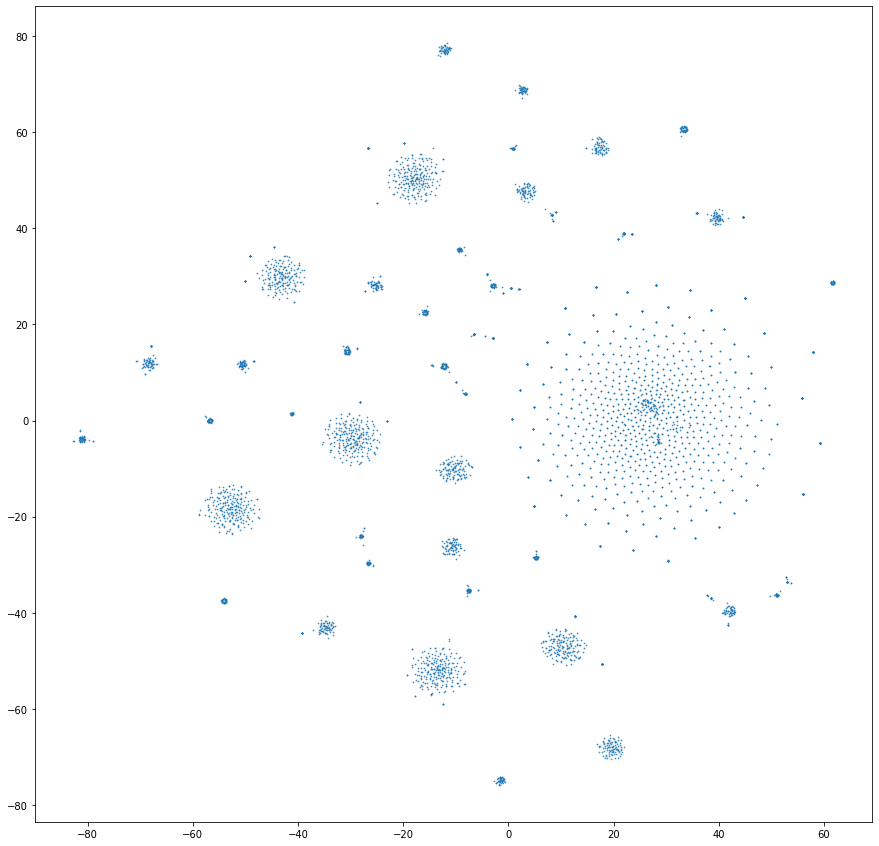

In [ ]:
# split embeddings into x and y dimension and plot
x = node_embeddings_2D[:,0]
y = node_embeddings_2D[:,1]
figure = plt.figure(figsize=(15, 15))
_ = plt.scatter(x, y, s=0.5, alpha=0.8)
_ = plt.axis('on')

In [ ]:
# finding list of congress members
congress_members_full = pd.read_csv('us-congress-tweets/congress_members.csv')
congress_members_list = congress_members_full['screen_name'].to_list()
members_list = []
node_labels = {node:i for i,node in enumerate(model.wv.vocab)}
for row in congress_members_full.iterrows():
  if row[1][1] in node_labels.keys():
    members_list.append(row[1][1])
len(members_list)

176

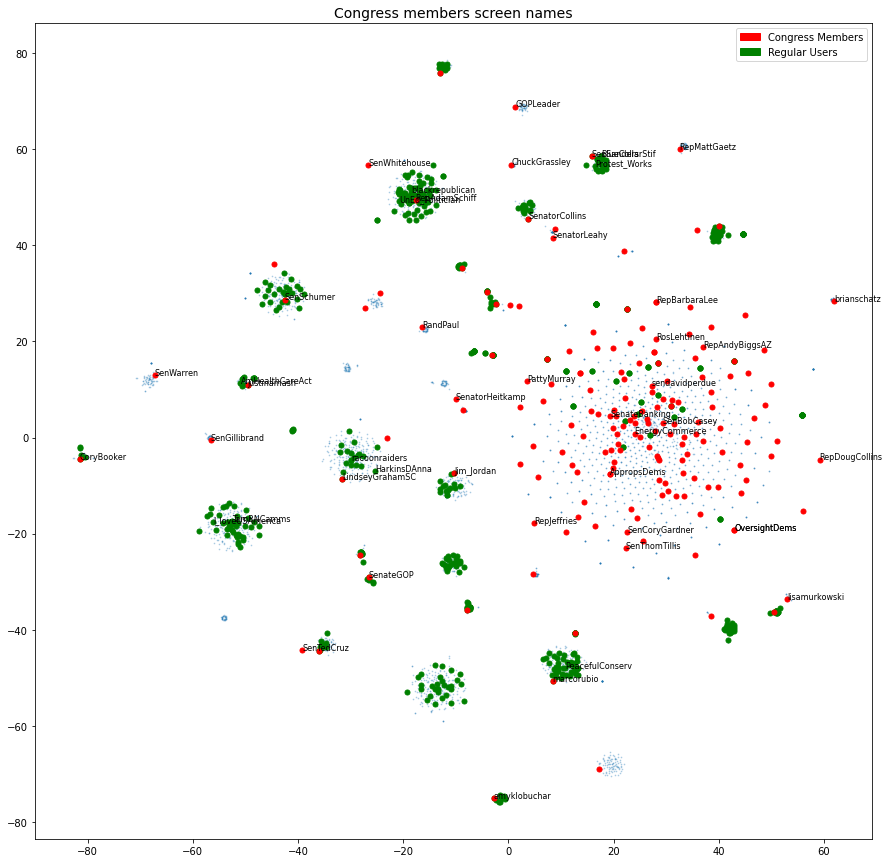

In [ ]:
# plot name for groups of picked congress members and users on the same plot as above
import matplotlib.patches as mpatches

congress_members = ['GOPLeader', 'amyklobuchar','RandPaul','OversightDems','RepMattGaetz',
      'SenSchumer','marcorubio','RepAdamSchiff','RepJeffries','SenCoryGardner','CoryBooker',
      'RepBarbaraLee', 'SenatorLeahy','SenGillibrand','SenWarren','SenWhitehouse','LindseyGrahamSC',
      'Jim_Jordan','SenThomTillis','SenSanders','SenatorHeitkamp','brianschatz',
      'SenateGOP','SenatorCollins','justinamash','RepAndyBiggsAZ','PattyMurray','SenTedCruz',
      'RosLehtinen','SenBobCasey','RepDougCollins', 'lisamurkowski',
      'OversightDems', 'ChuckGrassley', 'EnergyCommerce', 'SenateBanking', 'AppropsDems', 'sendavidperdue']

users = ['AmHealthCareAct', 'racoonraiders', 'HarkinsDAnna', 'UnEd_Politician',
         'blackrepublican', 'BlueCollarStif', 'Protest_Works', 'PeacefulConserv',
         'TamRNCamms', 'I_loveUSAmerica']

new_figure = plt.figure(figsize=(15, 15))
_ = plt.scatter(x, y, s=0.5, alpha=0.3)
_ = plt.axis('on')


node_labels = {node:i for i,node in enumerate(model.wv.vocab)}

i=0
for key in node_labels.keys(): 
  if i >600:
    break
  #if i%10==0 and key not in congress_members_full:
  plt.plot(x[node_labels[key]], y[node_labels[key]], '.', color='green', markeredgewidth=1, markersize=10)
    #plt.annotate(key, (x[node_labels[key]], y[node_labels[key]]), fontsize=8)
  i += 1
     
   
for group, i, color in [(congress_members,1, 'red'), (congress_members_list,2, 'red'), (users,3, 'green')]:
    for name in group:
        if i== 2:
          if name in node_labels and name not in congress_members:
            plt.plot(x[node_labels[name]], y[node_labels[name]], '.', color=color, markeredgewidth=1, markersize=10)
        else:
          plt.plot(x[node_labels[name]], y[node_labels[name]], '.', color=color, markeredgewidth=1, markersize=10)    
          plt.annotate(name, (x[node_labels[name]], y[node_labels[name]]), fontsize=8)
plt.title('Congress members screen names', size=14)   


red_patch = mpatches.Patch(color='red', label='Congress Members')
green_patch = mpatches.Patch(color='green', label='Regular Users')

plt.legend(handles=[red_patch, green_patch])

In [ ]:
print(model.wv.most_similar('gina_durosko', topn=50))

[('mjoehlerich', 0.9775764346122742), ('Pats2Cents', 0.9774091243743896), ('MariaIsrael4', 0.9773685336112976), ('RicoHalofan', 0.977271556854248), ('brookslc', 0.9771488904953003), ('PumaSF', 0.977141261100769), ('CarolynEvertso1', 0.9769970178604126), ('mondoam', 0.9768672585487366), ('kormylo1', 0.9762849807739258), ('MayIrmamay14', 0.9760864973068237), ('BethellMarilyn', 0.9760850071907043), ('mousejax', 0.9759936332702637), ('aNinjaswish', 0.975801944732666), ('jntucker2003', 0.9756813049316406), ('xsrgys', 0.9754794239997864), ('MichaelWalk6', 0.9754739999771118), ('BrazeauErin', 0.9753114581108093), ('Proud_Boomer2', 0.9751884937286377), ('ConeyDenizen', 0.975044846534729), ('Tasman3365', 0.9748541116714478), ('StaceyGraves240', 0.9747222661972046), ('TeedIsMe', 0.9744949340820312), ('PamelaWonders', 0.9744579792022705), ('debbiem09829430', 0.9743695855140686), ('TamRNCamms', 0.9741149544715881), ('Linda37800737', 0.9740338325500488), ('jen4247', 0.9740094542503357), ('CarlaGrea

In [ ]:
li = [str(element) for element in congress_members['screen_name'].tolist()] 
congress_nodes = []
for i in li:
  if i in node_labels.keys():
    congress_nodes.append(i)

"','".join(congress_nodes)

"RepLaMalfa','repcleaver','GOPLeader','SenatorBaldwin','SenatorTimScott','amyklobuchar','SanfordBishop','SenJeffMerkley','RepGusBilirakis','RandPaul','lisamurkowski','RepHultgren','OversightDems','MarshaBlackburn','KeithRothfus','repjohnlewis','MacTXPress','stabenow','SenatorBurr','RepMarshall','RepMattGaetz','RepDebDingell','RoKhanna','SenMikeLee','SenSchumer','marcorubio','RepKenMarchant','Sen_JoeManchin','SenBobCorker','sethmoulton','RepRichardNeal','RepWilson','SenStabenow','SenatorMenendez','MarkWarner','NormaJTorres','RepZoeLofgren','ChuckGrassley','RepTedDeutch','RepAdamSchiff','SenSherrodBrown','maziehirono','davidcicilline','RepAdams','BillPascrell','SenatorHassan','timkaine','RepDonBacon','senorrinhatch','SteveKingIA','RepTedLieu','SenShelby','SenatorCantwell','SenDuckworth','ChrisMurphyCT','RepJeffries','rep_stevewomack','RoyBlunt','SenCoryGardner','RepTedBudd','CongressmanHice','SteveScalise','RepJerryNadler','JeffFlake','RepBarragan','RepJimBanks','RonWyden','JohnCornyn','

In [ ]:
node_embeddings = np.array([[node] + list(model.wv.get_vector(node)) for node in model.wv.vocab])
emb_df = pd.DataFrame(node_embeddings)
emb_df.set_index(0, inplace=True)
emb_df.index.name = 0
emb_df

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
0,,,,,,,,,,,,,,,,,,,,,
marshamymarsha,0.00823818,0.27123678,-0.88787353,0.2966358,0.15137693,-0.20606449,-0.28077662,-0.048114035,-0.23989682,-0.04314178,...,0.32082886,0.30478412,0.20716734,-0.2862298,0.28359345,-0.46105987,0.12995383,0.025475971,0.24026498,0.39058498
HouseGOP,-0.03585569,0.20627186,-0.8236005,0.1100054,0.04946827,-0.08344108,-0.2348639,-0.17445336,-0.2003387,-0.1331011,...,0.35963002,0.17412779,0.015510679,-0.41885647,0.27033836,-0.47715303,-0.01044062,-0.0009799693,0.22483315,0.41784197
AlexanderKaty,0.03606215,0.21682522,-0.86104244,0.2981039,0.1956747,-0.12245969,-0.275641,-0.08303849,-0.2686899,-0.057486493,...,0.35135478,0.24190931,0.20103769,-0.30534735,0.22445765,-0.43769887,0.10387057,0.024588838,0.31832752,0.35320595
thecauseendures,-0.011560067,0.23223804,-0.8556366,0.24136668,0.13548714,-0.156558,-0.32119998,-0.10455991,-0.26672414,-0.05047473,...,0.39342532,0.26773837,0.20551793,-0.32630473,0.2565406,-0.4411303,0.11275026,0.03634676,0.25454554,0.4198588
StopYourLies,-0.039151102,0.16769429,-0.82504284,0.22770052,0.08415206,-0.15985306,-0.38536397,-0.057417754,-0.26344252,-0.080379374,...,0.37653118,0.19540294,0.086668946,-0.38251558,0.21766742,-0.47242445,0.11987668,-0.012035965,0.27445897,0.4383927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
danyellh1,-1.0539249,1.0760554,-0.7941847,0.13327065,-0.283921,-0.45618004,-0.14537014,-0.4243088,0.020528119,0.9099558,...,1.1431243,0.37077597,0.4858589,0.6988903,0.27720758,-0.065790206,-0.10105515,-0.48069862,-0.162138,0.17400783
dizzy_art,-0.5743444,0.4018159,-0.14616795,0.4660376,-0.06275115,-0.10382918,0.76024723,-0.10878538,0.5585675,0.47492126,...,0.44064635,0.08281003,-0.20176238,-0.13207556,0.81769365,-0.6214996,0.2677413,-0.99783826,-0.42020655,0.3987967
PamelaStovall6,-0.55503714,0.4128979,-0.13409714,0.48171178,-0.06931995,-0.10246813,0.7609077,-0.13320422,0.55274874,0.44123128,...,0.43509153,0.09268861,-0.20853744,-0.11286334,0.8180078,-0.63576025,0.29806283,-0.9770471,-0.43685535,0.4284653


In [ ]:
users = id_screen_name_map.keys()
users
user_freq = {}
for row in tweets_cos[['user_id', 'frequent_token']].iterrows():
  user_id = str(row[1][0])
  try:
    if user_id in users:
      user_freq[id_screen_name_map[user_id]] = row[1][1][0][0]
  except:
    pass    

In [ ]:
len(user_freq)

5743

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(node_embeddings)
df.shape

(4739, 2)

In [ ]:
kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(df)

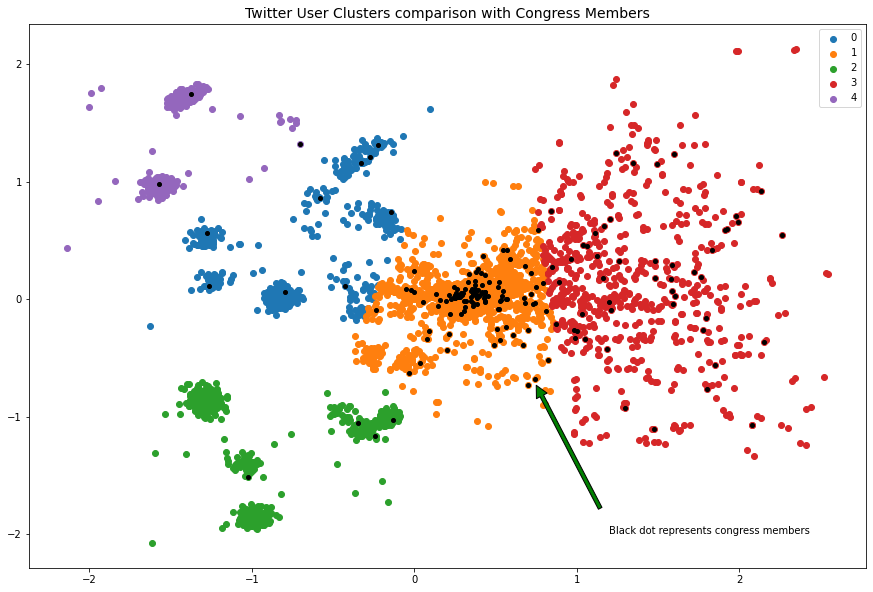

In [ ]:
u_labels = np.unique(label)
 
new_figure = plt.figure(figsize=(15, 10))
_ = plt.axis('on') 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)

x = df[:,0]
y = df[:,1]

node_labels = {node:i for i,node in enumerate(model.wv.vocab)}

for group, color in [(congress_members_list, 'red')]:
    for name in group:   
      if name in node_labels:
        plt.plot(x[node_labels[name]], y[node_labels[name]], '.', color='black', markeredgewidth=1, markersize=8)
plt.annotate('Black dot represents congress members', xy =(0.7, -0.6),
                xytext =(1.2, -2), 
                arrowprops = dict(facecolor ='green', shrink=0.1))      
plt.legend()
plt.title('Twitter User Clusters comparison with Congress Members', size=14)
plt.show()

Text(0.5, 1.0, 'Most frequent words by Users')

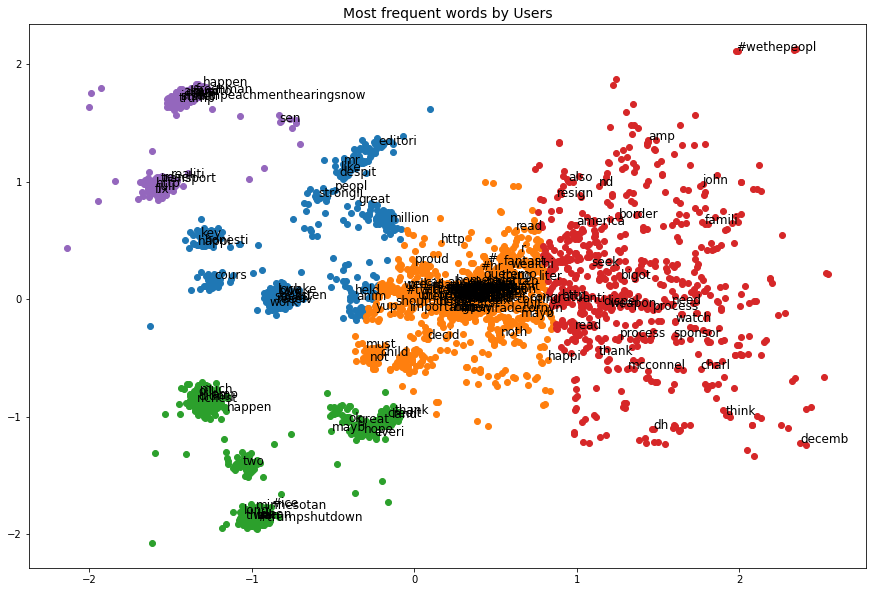

In [ ]:
u_labels = np.unique(label)
 
new_figure = plt.figure(figsize=(15, 10))
_ = plt.axis('on') 
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)

x = df[:,0]
y = df[:,1]

node_labels = {node:i for i,node in enumerate(model.wv.vocab)}

i=0
for key in node_labels.keys(): 
  if key in user_freq and i%15==0:  
    plt.annotate(user_freq[key], (x[node_labels[key]], y[node_labels[key]]), fontsize=12)
  i += 1
plt.title('Most frequent words by Users', size=14)  